In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style


## DRILL - Descriptive Statistics and Normality

*To complete the following drills, you'll need to use your Python skills to create some datasets, then use your new statistical knowledge to summarize them. **Choose 6 distributions** from the list of random distributions available in NumPy, called “Distributions”*

1. *Generate a random variable with **100 datapoints** using the code distributionvar = np.random.distributionname([arguments], 100), replacing distributionvar with an appropriate variable name and distributionname with the name of the distribution you’ve chosen, and filling in the empty space in the parentheses with your chosen values for the appropriate parameters. If you feel uncertain about how to do this, go back to the “Other Distributions” assignment for examples of code to use as a starting point.*

In [82]:
# this is the 'given' per the task above
#     format is    {'method'     : {ID : {kwargs                             }},     } 
my_distributions = {'binomial'   : {1  : {'n':3,      'p':0.75,    'size':100}},
                     'chisquare' : {1  : {'df':4,                  'size':100}},
                     'gamma'     : {1  : {'shape':5,  'scale':1.0, 'size':100}},
                     'laplace'   : {1  : {'loc':0.0,  'scale':1.0, 'size':100}},
                     'lognormal' : {1  : {'mean':0.0, 'sigma':1.0, 'size':100}},
                     'weibull'   : {1  : {'a':5,                   'size':100}}           
                    }

In [81]:
print(my_distributions.keys())
print(my_distributions['weibull'].keys())

dict_keys(['binomial', 'chisquare', 'gamma', 'laplace', 'lognormal', 'weibull'])
dict_keys([2])


In [83]:
# create df from numpy pdf's from dict {'distribution' : {kwargs}

def var_pdfs(dict):
    df = pd.DataFrame()
    for key in dict.keys():
        for ky in dict[key].keys():
            col = key + '_' + str(ky).rjust(3,'0')
            df[col] = getattr(np.random, key)(**dict[key][ky])    
    return df

In [84]:
my_distr_df = var_pdfs(my_distributions)
my_distr_df.describe()

,binomial_001,chisquare_001,gamma_001,laplace_001,lognormal_001,weibull_001
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.170000,3.648548,5.163985,-0.196805,1.171047,0.951297
std,0.817177,2.408700,2.420298,1.555749,1.221526,0.216610
min,0.000000,0.557724,1.260959,-5.362852,0.091150,0.351738
25%,2.000000,1.665791,3.284773,-0.878614,0.475199,0.825556
50%,2.000000,3.135598,5.245537,0.007857,0.860301,0.960947
75%,3.000000,5.086472,6.338441,0.617181,1.329496,1.126834
max,3.000000,13.630876,11.662599,5.694809,8.488408,1.331439


In [79]:
print(my_distr_df.columns)

Index(['binomial_001', 'chisquare_001', 'gamma_001', 'laplace_001',
       'lognormal_001', 'weibull_002'],
      dtype='object')


2. *Graph the variable using a histogram.*
3. *Compute the mean and standard deviation and plot them as vertical lines on the histogram. (Hint: the “When Does It Break?” assignment you just completed can help you here.)*

In [116]:
# this function plots a histogram per questions 2. and 3. above
# returns figure() of histograms in two column formaT from each DataFrame column



In [47]:
style.use = 'fivethirtyeight'

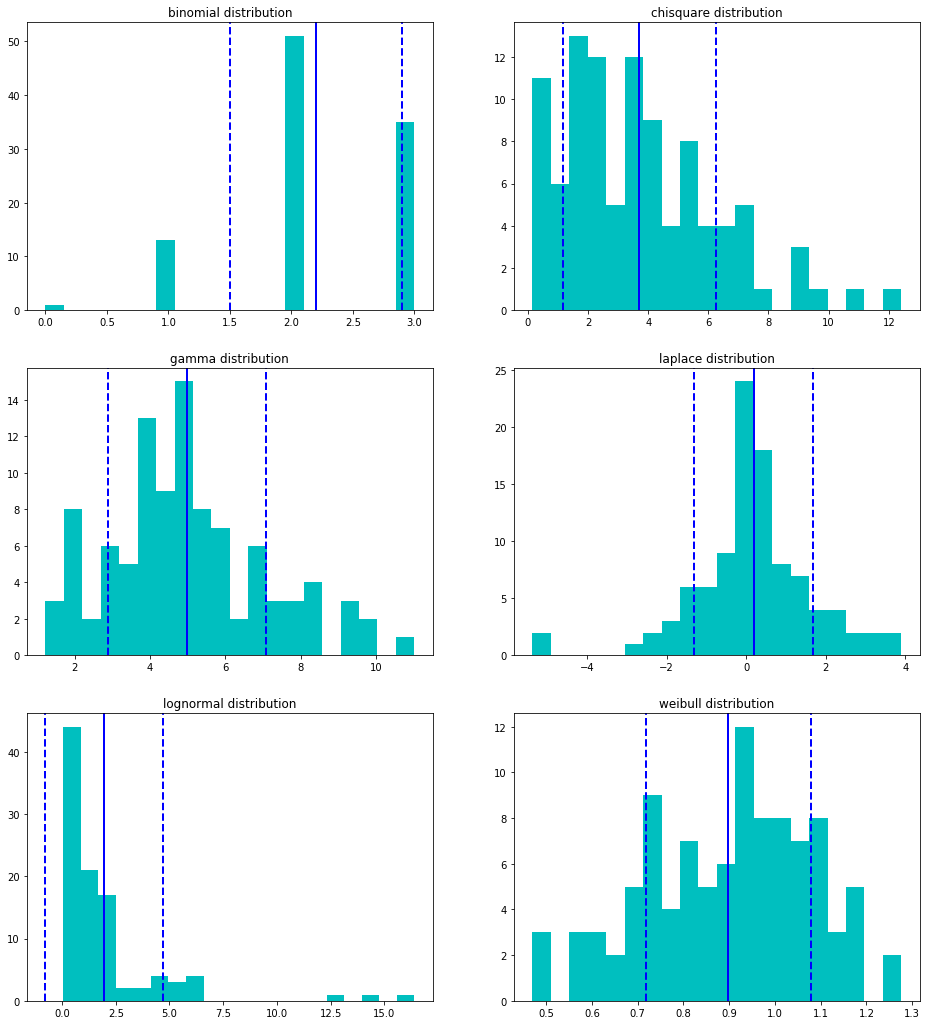

In [48]:
my_plot = hists_from_df(my_distr_df)

4. *Evaluate whether the descriptive statistics provided useful information about the variable. Can you identify any common characteristics of the distributions that could be usefully described using the mean and/or standard deviation, versus the ones that could not?*

Whether the mean and standard deviation are useful statistics depends on the distribution shape or how it relates to a Normal distribution. With respect to my six distributions, for the Binomial distribution both mean and standard deviation are not useful. Both statistics will describe the Laplace distribution. For the Log-normal distribution, the mean is useful while the standard deviation is not due to the skewed shape. For the Gamma, Weibull and Chi-square distribution it will depend on the shape parameters with the mean typically being relavent while the standard deviation is not. 
 


*Additionally:*

1. *Generate two normally-distributed variables, one with a mean of 5 and standard deviation of 0.5, and the other with a mean of 10 and standard deviation of 1.0*
2. *Add them together to create a third variable.*

In [176]:
# this is the 'given' per the task above
#       format is    {'method' : {ID : {kwargs                             }},     } 
more_distributions = {'normal' : {1  : {'loc':5.0,  'scale':0.5, 'size':1000},
                                  2  : {'loc':10.0, 'scale':1.0, 'size':1000}}
                     }

In [181]:
more_distr_df = var_pdfs(more_distributions)
more_distr_df['add_1_2'] = more_distr_df[more_distr_df.columns[0]] + more_distr_df[more_distr_df.columns[1]]
more_distr_df.describe()

,normal_001,normal_002,add_1_2
count,1000.000000,1000.000000,1000.000000
mean,4.996200,10.065105,15.061305
std,0.500036,1.033694,1.125854
min,3.446548,6.992427,11.629363
25%,4.659629,9.359109,14.301206
50%,4.989836,10.034507,15.034294
75%,5.339193,10.762280,15.776648
max,6.898345,13.486020,18.607861


3. *Graph the third variable using a histogram.*
4. *Compute the mean and standard deviation and plot them as vertical lines on the histogram.*
5. *Evaluate the descriptive statistics against the data.*

In [182]:
def hists_axis_set(df):
    col_wdth = 12; row_hght = 9; ncols = 1   # given
    nrows = len(df.columns)
    nbins = 50
    xmin = 3; ymin = 0; xmax = 18; ymax = 25
    
    fig = plt.figure(1, (col_wdth * ncols, row_hght * nrows))
                     
    index = 0
    for col in df.columns:
        index += 1
        plt.subplot(nrows, ncols, index)
        plt.hist(getattr(df, col), bins=nbins, color='c')

        #plt.axis([xmin, xmax, ymin, ymax])
        #plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
        
        plt.axvline(df[col].mean(), color='b', linestyle='solid', linewidth=2)                   # vertical line at the mean.    
        plt.axvline(df[col].mean() + df[col].std(), color='b', linestyle='dashed', linewidth=2)  # dashed line at +1 std dev
        plt.axvline(df[col].mean() - df[col].std(), color='b', linestyle='dashed', linewidth=2)  # dashed line at -1 std dev
        plt.title(col + ' distribution')
        
    return fig

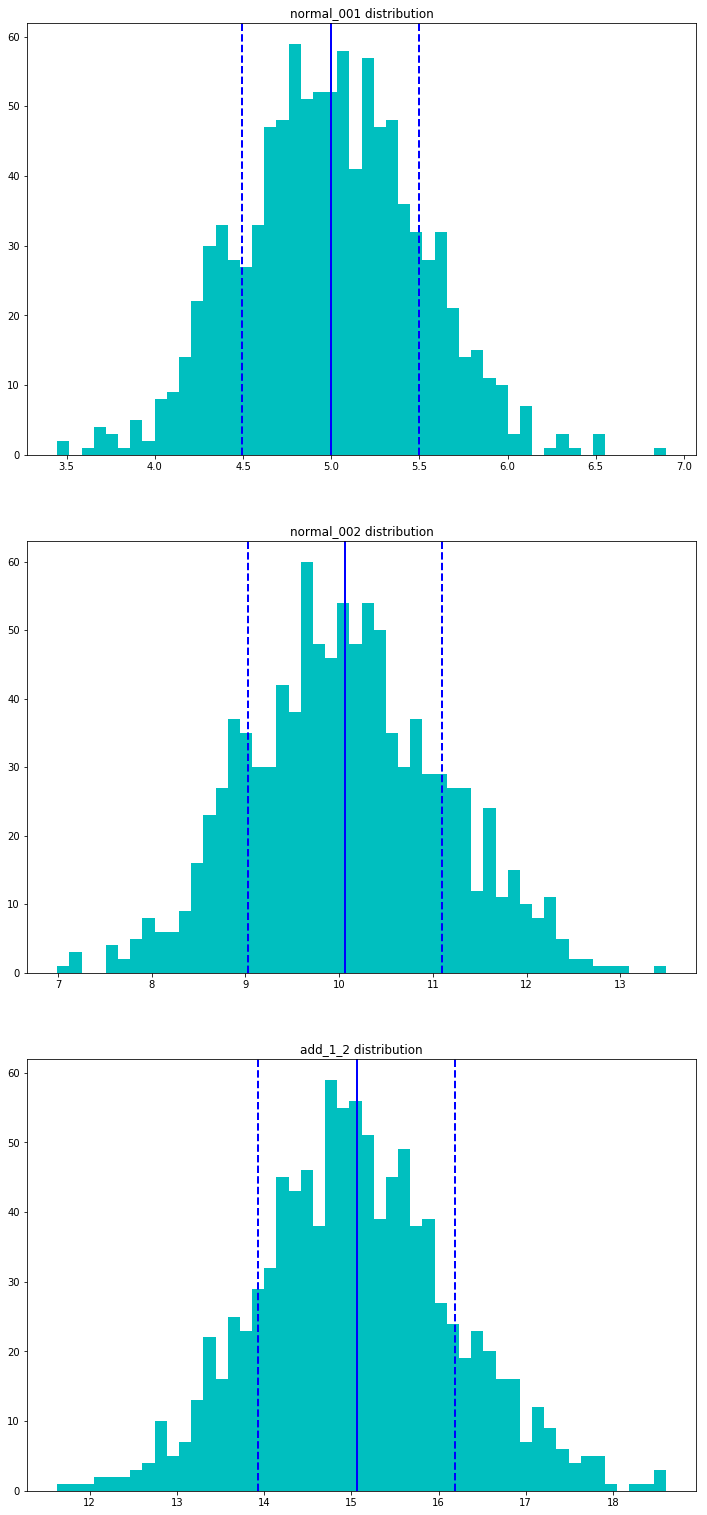

In [183]:
more_plot = hists_axis_set(more_distr_df)